In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# post-hoc
predictions = np.load('../processed_data/predict_video_2.npy')
# real-time 
onset_times = np.load('../processed_data/onset_times_video_2.npy')

In [3]:
stim_on = 2
# in seconds, when did the animal perform behavior 2
behavior_times = np.where(predictions==stim_on)[0]/10
behavior_times

array([  26.5,   27.2,   27.3, ..., 3896.1, 3897.3, 3897.5])

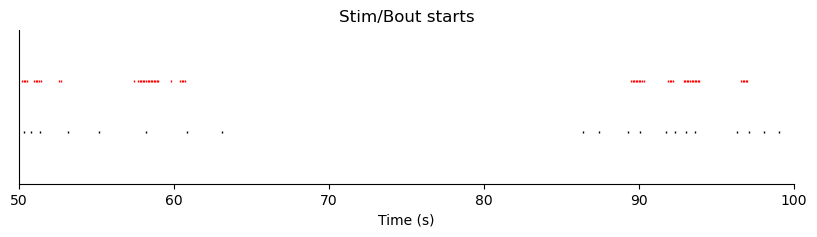

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
ax.plot(onset_times,
        np.ones_like(onset_times),
        ls='', marker='|', markersize=1, c='k', alpha=1)
ax.plot(behavior_times,
        np.ones_like(behavior_times)+0.5,
        ls='', marker='|', markersize=1, c='r', alpha=1)
ax.set_yticks([])
ax.set_ylim([0.5, 2])
ax.set_xlim([50, 100])
ax.set_title('Stim/Bout starts')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Time (s)')
plt.show()

In [5]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
num_behaviors_post = np.unique([predictions[id_start] for id_start in idx_start], return_counts=True)[1][stim_on]

if len(onset_times)<num_behaviors_post:
    print(f'this session matched behavior {stim_on} *** {len(onset_times)/num_behaviors_post*100}% of the time')
else:
    print(f'this session matched behavior {stim_on} *** {num_behaviors_post/len(onset_times)*100}% of the time')


this session matched behavior 2 *** 96.34146341463415% of the time
